In [1]:
import sys
import os
sys.path.append('../')

In [5]:
from data.artportalen_goleag import ArtportalenDataModule

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
skeleton = True

# data = ArtportalenDataModule(data_dir='/Users/amee/Library/CloudStorage/GoogleDrive-ameeassad@gmail.com/My Drive/artportalen_goeag', batch_size=4, size=256, mean=mean, std=std)
data = ArtportalenDataModule(data_dir='/Users/amee/Library/CloudStorage/GoogleDrive-ameeassad@gmail.com/My Drive/artportalen_goeag', batch_size=4, size=256, mean=mean, std=std, cache_dir="../dataset/data_cache", preprocess_lvl=3)
# data.setup_from_coco('../annot/modified_val_annotations.json', '../annot/modified_val_annotations.json')
# data.setup_from_csv('../annot/train_sep_sightings.csv', '../annot/val_sep_sightings.csv')
data.setup_from_csv('../dataset/annot/final_train_sep_sightings.csv', '../dataset/annot/final_val_sep_sightings.csv')
dataloader = data.train_dataloader()



Train: 2362 Val: 840
Unique classes in dataset: [1 3 2 4 5]
Number of classes: 5


Batch Size: 4
Image Shape: torch.Size([4, 4, 256, 256])
Labels Shape: torch.Size([4])


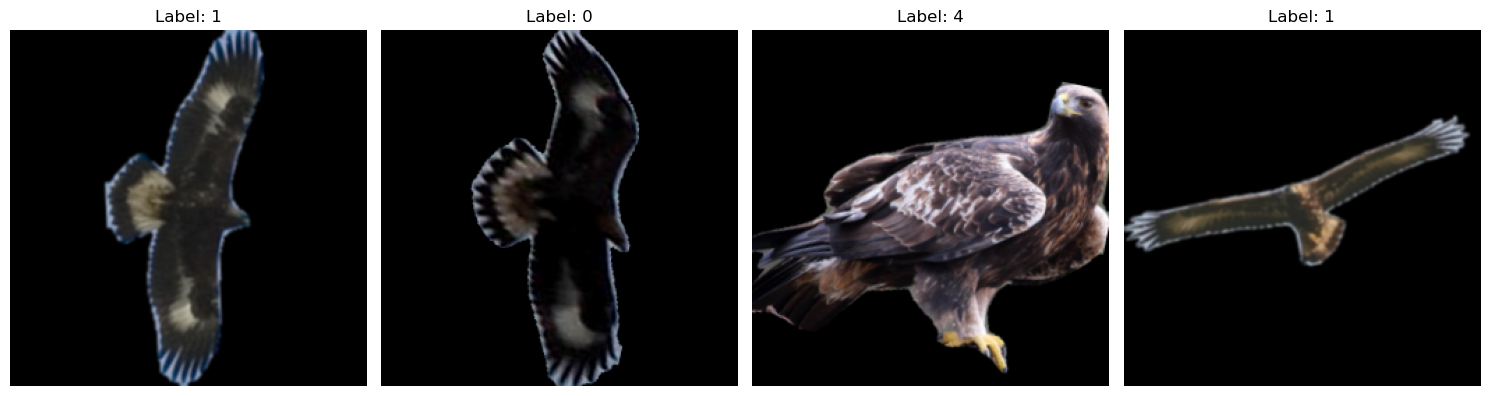

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from data.data_utils import unnormalize

# Fetch a batch of images (assuming batch size is 8 for example)
batch = next(iter(dataloader))
images,labels = batch
print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)
print("Labels Shape:", labels.shape)

# Extract images and labels from the batch
images, labels = batch  # This assumes batch is structured as (images, labels)

# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
axes = axes.flatten()

for i in range(4):  # Assuming batch size is 8
    image_np = unnormalize(images[i], mean, std).permute(1, 2, 0).numpy()  # [:3] selects RGB channels

    # image_np = images[i].numpy()  # Convert from PyTorch tensor to numpy array
    # image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    label = labels[i].item()  # Convert label tensor to Python scalar using .item()
    ax = axes[i]
    ax.imshow(image_np)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Batch Size: 4
Image Shape: torch.Size([4, 4, 256, 256])
Labels Shape: torch.Size([4])


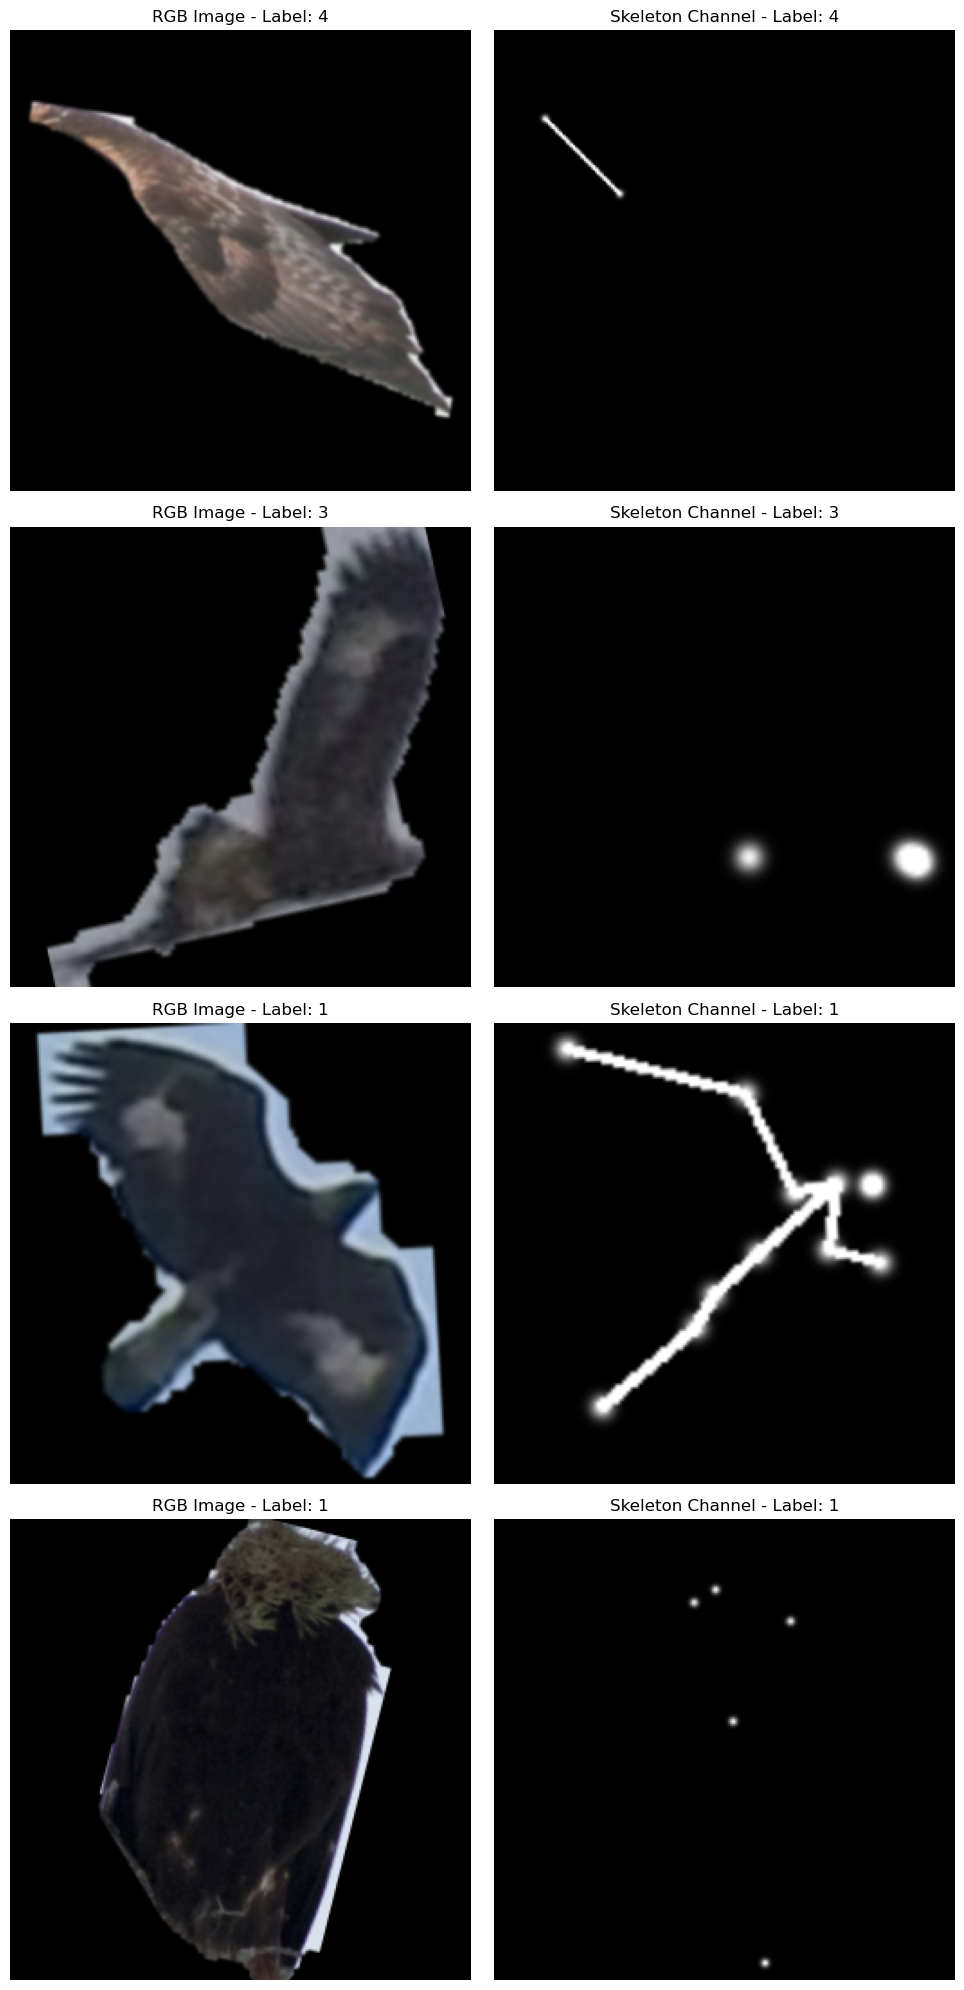

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from data.data_utils import unnormalize

batch = next(iter(dataloader))
images, labels = batch

print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)
print("Labels Shape:", labels.shape)

# Plot the images and their skeletons side by side
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 4 rows, 2 columns (RGB and skeleton for each image)
axes = axes.flatten()

for i in range(4):  # Assuming batch size is at least 4
    # Unnormalize the RGB part
    rgb_image = unnormalize(images[i], mean, std).permute(1, 2, 0).numpy()  # First 3 channels (RGB)
    skeleton_image = images[i][3].cpu().numpy()  # 4th channel (Skeleton)

    # Plot RGB image
    ax_rgb = axes[i * 2]
    ax_rgb.imshow(np.clip(rgb_image, 0, 1))  # Clip values to [0, 1] for valid image display
    ax_rgb.set_title(f'RGB Image - Label: {labels[i].item()}')
    ax_rgb.axis('off')

    # Plot Skeleton image (grayscale)
    ax_skel = axes[i * 2 + 1]
    ax_skel.imshow(skeleton_image, cmap='gray')  # Plot skeleton channel as a grayscale image
    ax_skel.set_title(f'Skeleton Channel - Label: {labels[i].item()}')
    ax_skel.axis('off')

plt.tight_layout()
plt.show()